In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import gin
import numpy as np
import torch
import pytorch_lightning
from deepgene.models import GruLabeler, LstmLabeler
from deepgene.data import DatasetXY
from tqdm import tqdm
import scipy 
import seaborn as sns

from matplotlib import pyplot as plt
from os.path import join

sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set_context("paper")

In [3]:
import gin
gin.clear_config()
gin.parse_config_files_and_bindings(["configs/gru/data2.gin", 
                                   "configs/gru/train.gin", 
                                   "configs/gru/model.gin"], "")

[ParsedConfigFileIncludesAndImports(filename='configs/gru/data2.gin', imports=['deepgene.data'], includes=[]),
 ParsedConfigFileIncludesAndImports(filename='configs/gru/train.gin', imports=[], includes=[]),
 ParsedConfigFileIncludesAndImports(filename='configs/gru/model.gin', imports=['deepgene.models'], includes=[])]

# Model

In [4]:
gru_model = GruLabeler.load_from_checkpoint(checkpoint_path="notebooks/weights.ckpt").eval()

# Data

In [5]:
data = iter(DatasetXY().test_dataloader())

data_point_1 = next(data)

X = data_point_1[0]
y_true = data_point_1[1]

In [20]:
y_true

tensor([[3., 3., 3.,  ..., 4., 4., 4.]])

In [17]:
print(pytorch_lightning.__version__)
import comet_ml
print(comet_ml.__version__)
print(torch.__version__)

1.7.7
3.31.15
1.11.0


# Pred

In [26]:
y_pred = gru_model(X).detach().numpy()

In [27]:
def plot_heatmap(y_pred, y_true, length):
    sns.set(rc={'figure.figsize' : (11.7, 8.27),
           'axes.labelsize': 20,
           'axes.titlesize': 20, 
            'figure.dpi':100
           }
       )
    ax = sns.heatmap(y_pred.squeeze(0)[:length].T, cmap="viridis", yticklabels=5, xticklabels=1000)
    ax.plot(y_true[0][:length], c='red')
    _ = ax.set(xlabel='Genome wide', ylabel='Coalescent time')
    #ax.set_ylim([23, 0])
    plt.show()

In [28]:
def myexp(data):
    return scipy.special.softmax(data, axis=-1)

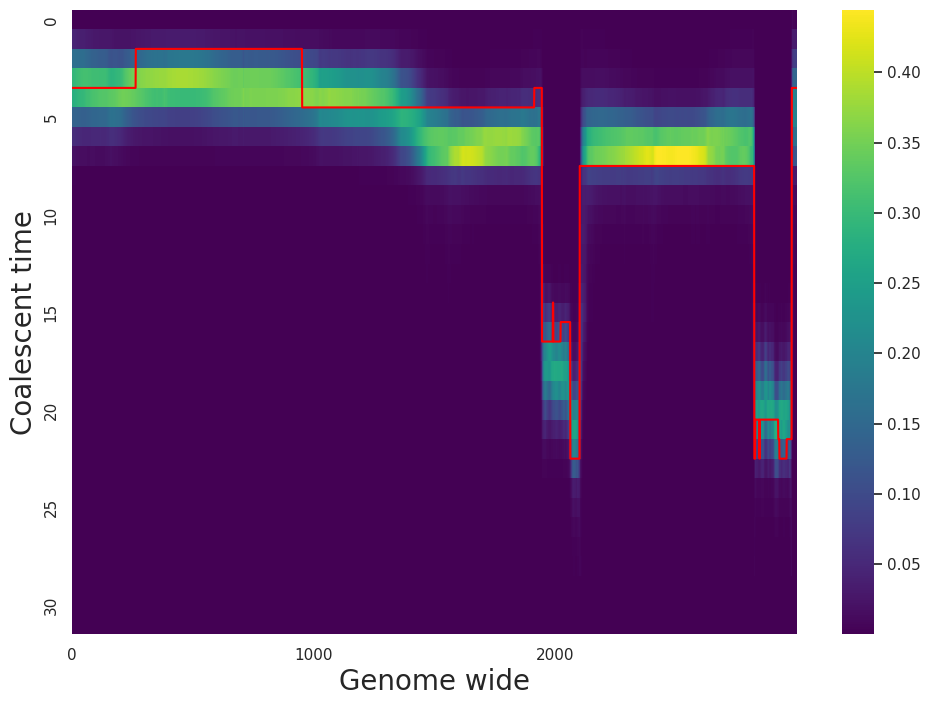

In [30]:
plot_heatmap(myexp(y_pred), y_true, 3000)

In [11]:
import numpy as np
def dummy_generator(shape=(1, 3)):
    while True:
        yield np.random.rand(*shape), np.random.randint(0, 2)

generator = dummy_generator()
X, y = next(generator)

In [12]:
train_generator = dummy_generator()
val_generator = dummy_generator()
test_generator = dummy_generator()

In [13]:
data_module = DatasetXY(
        train_generator=train_generator,
        val_generator=val_generator,
        test_generator=test_generator,
        batch_size=8,
        num_workers=8
    )

In [14]:
data_module = DatasetXY(
        train_generator=train_generator,
        val_generator=val_generator,
        test_generator=test_generator,
        batch_size=8,
        num_workers=8
    )

In [15]:
data = iter(DatasetXY().test_dataloader())

data_point_1 = next(data)

X = data_point_1[0]
y_true = data_point_1[1]